In [ ]:
Cross-validation with ShuffleSplit

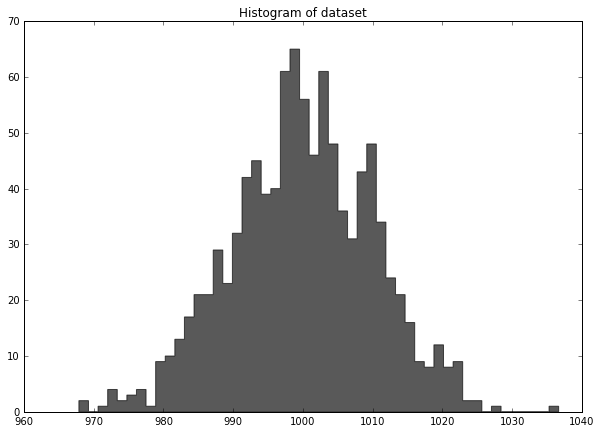

In [1]:
%matplotlib inline

import numpy as np
true_mean = 1000
true_std = 10
N = 1000
dataset = np.random.normal(loc= true_mean, scale = true_std, size=N)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 7))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled',bins=50)
ax.set_title("Histogram of dataset")

In [2]:
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set[:N/2].mean()
estimate

999.89204062337774

In [3]:
data_mean = dataset.mean()
data_mean

999.9625653902167

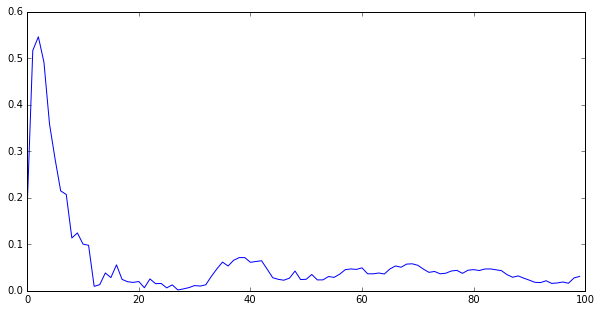

In [4]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=100, test_size=.5, random_state=0)
mean_p = []
estimate_closeness = []
for train_index, not_used_index in shuffle_split.split(fitting_set):
    mean_p.append(fitting_set[train_index].mean())
    shuf_estimate = np.mean(mean_p)
    estimate_closeness.append(np.abs(shuf_estimate - dataset.mean()))

plt.figure(figsize=(10,5))
plt.plot(estimate_closeness)